In [1]:
# IMPORT LIBRARIES AND CONNECT TO THE DATABASE FILE

import sqlite3
import pandas as pd

df = pd.read_csv('Loan.csv')

conn = sqlite3.connect('Loan.db')
cursor= conn.cursor()

In [2]:
# CREATE TABLE FOR LOANS

table_name = 'loans'

columns = ", ".join([f"{col.replace(' ', '_')}" for col in df.columns])
create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({columns});"

cursor.execute(create_table_query)
cursor.fetchall()

[]

In [2]:
# CHECK TO SEE IF TABLE WAS CREATED SUCCESSFULLY

cursor.execute('pragma table_info(loans);')
cursor.fetchall()

[(0, 'ApplicationDate', '', 0, None, 0),
 (1, 'Age', '', 0, None, 0),
 (2, 'AnnualIncome', '', 0, None, 0),
 (3, 'CreditScore', '', 0, None, 0),
 (4, 'EmploymentStatus', '', 0, None, 0),
 (5, 'EducationLevel', '', 0, None, 0),
 (6, 'Experience', '', 0, None, 0),
 (7, 'LoanAmount', '', 0, None, 0),
 (8, 'LoanDuration', '', 0, None, 0),
 (9, 'MaritalStatus', '', 0, None, 0),
 (10, 'NumberOfDependents', '', 0, None, 0),
 (11, 'HomeOwnershipStatus', '', 0, None, 0),
 (12, 'MonthlyDebtPayments', '', 0, None, 0),
 (13, 'CreditCardUtilizationRate', '', 0, None, 0),
 (14, 'NumberOfOpenCreditLines', '', 0, None, 0),
 (15, 'NumberOfCreditInquiries', '', 0, None, 0),
 (16, 'DebtToIncomeRatio', '', 0, None, 0),
 (17, 'BankruptcyHistory', '', 0, None, 0),
 (18, 'LoanPurpose', '', 0, None, 0),
 (19, 'PreviousLoanDefaults', '', 0, None, 0),
 (20, 'PaymentHistory', '', 0, None, 0),
 (21, 'LengthOfCreditHistory', '', 0, None, 0),
 (22, 'SavingsAccountBalance', '', 0, None, 0),
 (23, 'CheckingAccountBal

In [4]:
# UPDATE TABLE WITH THE DATA FROM Loan.csv FILE

for index, row in df.iterrows():
    values = ", ".join([f'"{row_item}"' for row_item in row])
    insert_sql = f"INSERT INTO {table_name} ({', '.join(df.columns.str.replace(' ', '_'))}) VALUES ({values})"
    cursor.execute(insert_sql)

In [3]:
cursor.execute('SELECT COUNT(*) FROM loans')
cursor.fetchall()

[(20000,)]

In [4]:
df.shape

(20000, 36)

In [8]:
#conn.commit()
#conn.close()

In [5]:
conn = sqlite3.connect('Loan.db')
cursor= conn.cursor()

cursor.execute('SELECT ApplicationDate, Age, AnnualIncome, CreditScore, RiskScore, LoanAmount FROM loans')
cursor.fetchall()

[('2018-01-01', '45', '39948', '617', '49.0', '13152'),
 ('2018-01-02', '38', '39709', '628', '52.0', '26045'),
 ('2018-01-03', '47', '40724', '570', '52.0', '17627'),
 ('2018-01-04', '58', '69084', '545', '54.0', '37898'),
 ('2018-01-05', '37', '103264', '594', '36.0', '9184'),
 ('2018-01-06', '37', '178310', '626', '44.0', '15433'),
 ('2018-01-07', '58', '51250', '564', '50.0', '12741'),
 ('2018-01-08', '49', '97345', '516', '42.400000000000006', '19634'),
 ('2018-01-09', '34', '116841', '603', '61.0', '55353'),
 ('2018-01-10', '46', '40615', '612', '53.0', '25443'),
 ('2018-01-11', '34', '73646', '478', '47.0', '48716'),
 ('2018-01-12', '34', '15000', '591', '56.0', '30088'),
 ('2018-01-13', '42', '74453', '573', '56.0', '16154'),
 ('2018-01-14', '18', '100508', '580', '63.0', '20439'),
 ('2018-01-15', '19', '47624', '597', '58.0', '27197'),
 ('2018-01-16', '33', '56650', '605', '33.6', '12652'),
 ('2018-01-17', '27', '50042', '582', '53.0', '19105'),
 ('2018-01-18', '43', '142326',

In [40]:
# SUBSET OF DATA CONTAINING CREDIT AND RISK SCORE FOR APPROVED LOANS

query = "SELECT ApplicationDate, Age, AnnualIncome, CreditScore, RiskScore, LoanApproved FROM loans WHERE LoanApproved = '1'"
cr1 = pd.read_sql_query(query,conn)
cr1.to_csv("creditrisk_loanapproved.csv",index = False)

In [42]:
# DEBUGGING AN ERROR IN THE ABOVE QUERY

#cursor.execute("SELECT LoanApproved FROM loans LIMIT 10").fetchall()
cursor.execute("SELECT DISTINCT LoanApproved FROM loans").fetchall()

ProgrammingError: Cannot operate on a closed database.

In [56]:
# CREATE TABLE FOR APPROVED LOANS

table_name = 'approved_loans'

columns = ", ".join([f"{col.replace(' ', '_')}" for col in cr1.columns]) # Eg: page_id TEXT, name TEXT, urslug TEXT, ...
create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({columns});"

cursor.execute(create_table_query)
cursor.fetchall()

[]

In [57]:
# CHECK TO SEE IF TABLE WAS CREATED SUCCESSFULLY

cursor.execute('pragma table_info(approved_loans);')
cursor.fetchall()

[(0, 'ApplicationDate', '', 0, None, 0),
 (1, 'Age', '', 0, None, 0),
 (2, 'AnnualIncome', '', 0, None, 0),
 (3, 'CreditScore', '', 0, None, 0),
 (4, 'RiskScore', '', 0, None, 0),
 (5, 'LoanApproved', '', 0, None, 0)]

In [58]:
cursor.execute('SELECT Age, AnnualIncome FROM approved_loans')
cursor.fetchall()

[]

In [59]:
cursor.fetchall()

[]

In [60]:
# UPDATE TABLE WITH THE DATA FROM creditrisk_loanapproved.csv FILE

for index, row in cr1.iterrows():
    values = ", ".join([f'"{row_item}"' for row_item in row])
    insert_sql = f"INSERT INTO {table_name} ({', '.join(cr1.columns.str.replace(' ', '_'))}) VALUES ({values})"
    cursor.execute(insert_sql)

In [61]:
cursor.execute('SELECT Age, AnnualIncome FROM approved_loans')
cursor.fetchall()

[('37', '103264'),
 ('37', '178310'),
 ('49', '97345'),
 ('33', '56650'),
 ('43', '142326'),
 ('57', '106749'),
 ('40', '114216'),
 ('36', '60227'),
 ('42', '78701'),
 ('18', '24914'),
 ('42', '163303'),
 ('42', '99920'),
 ('43', '121939'),
 ('47', '124086'),
 ('52', '272693'),
 ('36', '69003'),
 ('26', '77555'),
 ('39', '67367'),
 ('32', '54128'),
 ('58', '90788'),
 ('39', '190445'),
 ('57', '86699'),
 ('43', '100032'),
 ('36', '152650'),
 ('22', '59830'),
 ('43', '55308'),
 ('30', '94238'),
 ('38', '45145'),
 ('18', '87673'),
 ('29', '125711'),
 ('23', '73576'),
 ('66', '56816'),
 ('33', '55383'),
 ('41', '65180'),
 ('21', '149736'),
 ('27', '66417'),
 ('58', '134691'),
 ('36', '44364'),
 ('55', '113523'),
 ('45', '93617'),
 ('28', '72220'),
 ('53', '259639'),
 ('51', '91953'),
 ('37', '36562'),
 ('44', '99138'),
 ('49', '88064'),
 ('40', '177855'),
 ('36', '44377'),
 ('47', '163133'),
 ('45', '117455'),
 ('37', '68157'),
 ('48', '117456'),
 ('50', '111020'),
 ('42', '56320'),
 ('44'

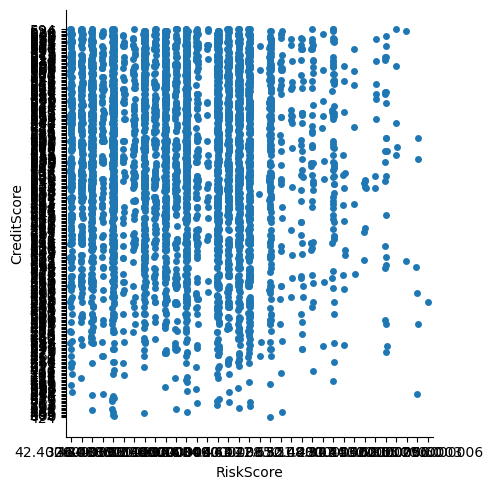

In [27]:
# PLOTTING THE DISTRIBUTION OF CREDIT SCORES FOR APPROVED LOANS

import seaborn as sb

sb.catplot(data=cr1, x="RiskScore", y="CreditScore")

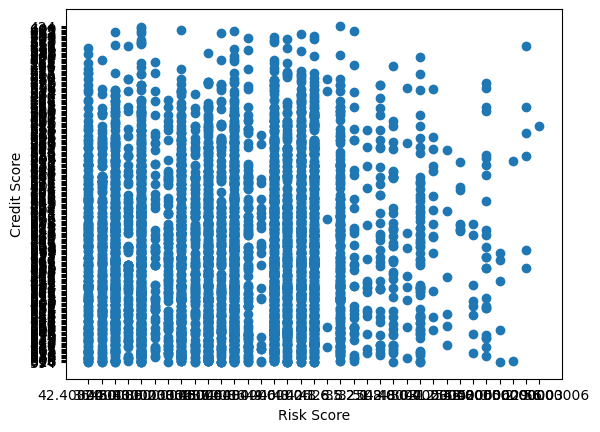

In [21]:
import matplotlib.pyplot as pp
pp.scatter(cr1['RiskScore'],cr1['CreditScore'])
pp.xlabel('Risk Score')
pp.ylabel('Credit Score')
pp.show()

In [49]:
# MINIMUM CREDITSCORE
cursor.execute('SELECT MIN(CreditScore) FROM approved_loans')
cursor.fetchall()

[('382',)]

In [50]:
# MAXIMUM CREDITSCORE
cursor.execute('SELECT MAX(CreditScore) FROM approved_loans')
cursor.fetchall()

[('712',)]

In [51]:
# MINIMUM RISKSCORE
cursor.execute('SELECT MIN(RiskScore) FROM approved_loans')
cursor.fetchall()

[('28.8',)]

In [52]:
cursor.execute('SELECT MAX(RiskScore) FROM approved_loans')
cursor.fetchall()

[('56.0',)]

In [67]:
# CALCULATING THE PROBABILITY THAT AN APPROVED LOAN HAS A CREDIT SCORE GREATER THAT 500

# Sum of Credit Scores
#cursor.execute('SELECT SUM(CreditScore) FROM approved_loans')
#cursor.fetchall()  # See result of above query
#sum_cs_total = 2794073   # Store result in a variable

# Sum of Credit Scores Greater than 500
#cursor.execute('SELECT SUM(CreditScore) FROM approved_loans WHERE CreditScore > 500')
#cursor.fetchall()
#sum_cs = "incorrect output"

# Probability of Credit Score > 500
#prob_cs = sum_cs / sum_cs_total

print('For some reason this code does not work, but please find the info below')
print('Sum of All Credit Scores: 2,794,073')
print('Sum of Credit Scores greater than 500: 2,657,497')
print('Therefore the probability results to 95.11%')

In [ ]:
# CALCULATING THE PROBABILITY THAT AN APPROVED LOAN HAS A RISK SCORE LESS THAT 40

#sum_rs = cursor.execute('SELECT SUM(RiskScore) FROM approved_loans')

print('For some reason this code does not work, but please find the info below')
print('Sum of All Risk Scores: 191,837.6')
print('Sum of Risk Scores less than 40: 81,800')
print('Therefore the probability results to 46.64%')

In [63]:
# DEBUGGING ISSUES WITH CREATION OF LOANS APPROVED TABLE

# Step 2: Create the `approved_loans` table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS approved_loans (
    ApplicationDate TEXT,
    Age INTEGER,
    AnnualIncome REAL,
    CreditScore INTEGER,
    RiskScore REAL,
    LoanApproved INTEGER
);
''')

# Step 3: Insert Data Into `approved_loans` Table
if not cr1.empty:
    cr1.to_sql('approved_loans', conn, if_exists='replace', index=False)
    print("Data successfully inserted into approved_loans table.")
else:
    print("No data available to insert into approved_loans table.")
    
# Step 4: Verify Data in the `approved_loans` Table
cursor.execute("SELECT COUNT(*) FROM approved_loans")
row_count = cursor.fetchone()[0]
print(f"Rows in approved_loans table: {row_count}")

# Close the connection
conn.commit()
conn.close()

Data successfully inserted into approved_loans table.
Rows in approved_loans table: 4780


In [10]:
# CALCULATING IMPORTANT STATISTICS FOR APPROVED LOANS

# Average Credit Score for Approved Loans
mean_credit = cursor.execute('SELECT AVG(CreditScore) FROM approved_loans')
#print(mean_credit.fetchall())

# Average Risk Score for Approved Loans
mean_risk = cursor.execute('SELECT AVG(RiskScore) FROM approved_loans')
#print(mean_risk.fetchall())

# Variance of Credit Scores for Approved Loans
var_credit = cursor.execute('''SELECT SUM((CreditScore-(SELECT AVG(CreditScore) FROM approved_loans))*(CreditScore-(SELECT AVG(CreditScore) FROM approved_loans)))/
(COUNT(CreditScore)-1) FROM approved_loans''')
#print(var_credit.fetchall())

# Variance of Risk Scores for Approved Loans
var_risk = cursor.execute('''SELECT SUM((RiskScore-(SELECT AVG(RiskScore) FROM approved_loans))*(RiskScore-(SELECT AVG(RiskScore) FROM approved_loans)))/
(COUNT(RiskScore)-1) FROM approved_loans''')
#print(var_risk.fetchall())


# **After realising the difficulty of using SQL for these calculations, I decided to switch to the python 'numpy' library

import numpy as np
import math
cr1 = pd.read_csv("creditrisk_loanapproved.csv")

#   CREDIT SCORE
# Average credit score
mean_cs_approved = np.mean(cr1['CreditScore'])
print(f"Average Credit Score for Approved Loans: {mean_cs_approved}")

# Variance of credit scores
var_cs_approved = np.var(cr1['CreditScore'])
print(f"Variance of Credit Scores for Approved Loans: {var_cs_approved}")

# 95% Confidence Interval for credit scores
lowerlimit_cs_approved = mean_cs_approved - 0.95 * math.sqrt(var_cs_approved / 20000)
upperlimit_cs_approved = mean_cs_approved + 0.95 * math.sqrt(var_cs_approved / 20000)
print(lowerlimit_cs_approved)
print(upperlimit_cs_approved)
print(f'We can say with 95% confidence that credit scores fall in the range between {lowerlimit_cs_approved} and {upperlimit_cs_approved}')

#   RISK SCORE
# Average risk score
mean_rs_approved = np.mean(cr1['RiskScore'])
print(f"Average Risk Score for Approved Loans: {mean_rs_approved}")

# Variance of risk scores
var_rs_approved = np.var(cr1['RiskScore'])
print(f"Variance of Risk Scores for Approved Loans: {var_rs_approved}")

# 95% Confidence Interval for risk scores
lowerlimit_rs_approved = mean_rs_approved - 0.95 * math.sqrt(var_rs_approved / 20000)
upperlimit_rs_approved = mean_rs_approved + 0.95 * math.sqrt(var_rs_approved / 20000)
print(lowerlimit_rs_approved)
print(upperlimit_rs_approved)
print(f'We can say with 95% confidence that risk scores fall in the range between {lowerlimit_rs_approved} and {upperlimit_rs_approved}')

Average Credit Score for Approved Loans: 584.53410041841
Variance of Credit Scores for Approved Loans: 2407.016201178203
584.2045300828545
584.8636707539656
We can say with 95% confidence that credit scores fall in the range between 584.2045300828545 and 584.8636707539656
Average Risk Score for Approved Loans: 40.133389121338915
Variance of Risk Scores for Approved Loans: 15.049119476199746
40.10732973691864
40.15944850575919
We can say with 95% confidence that risk scores fall in the range between 40.10732973691864 and 40.15944850575919


In [76]:
# SUBSET OF DATA CONTAINING CREDIT AND RISK SCORE FOR DECLINED LOANS

query = "SELECT ApplicationDate, Age, AnnualIncome, CreditScore, RiskScore, LoanApproved FROM loans WHERE LoanApproved = '0'"
cr0 = pd.read_sql_query(query,conn)
cr0.to_csv("creditrisk_loandeclined.csv",index = False) 

In [71]:
# Step 2: Create the `declined_loans` table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS declined_loans (
    ApplicationDate TEXT,
    Age INTEGER,
    AnnualIncome REAL,
    CreditScore INTEGER,
    RiskScore REAL,
    LoanApproved INTEGER
);
''')

# Step 3: Insert Data Into `declined_loans` Table
if not cr0.empty:
    cr0.to_sql('declined_loans', conn, if_exists='replace', index=False)
    print("Data successfully inserted into declined_loans table.")
else:
    print("No data available to insert into declined_loans table.")
    
# Step 4: Verify Data in the `declined_loans` Table
cursor.execute("SELECT COUNT(*) FROM declined_loans")
row_count = cursor.fetchone()[0]
print(f"Rows in declined_loans table: {row_count}")

# Close the connection
conn.commit()
conn.close()

Data successfully inserted into declined_loans table.
Rows in declined_loans table: 15220


In [9]:
# CALCULATING IMPORTANT STATISTICS FOR DECLINED LOANS

import numpy as np
import math
cr0 = pd.read_csv("creditrisk_loandeclined.csv")

#   CREDIT SCORE
# Average credit score
mean_cs_declined = np.mean(cr0['CreditScore'])
print(f"Average Credit Score for Declined Loans: {mean_cs_declined}")

# Variance of credit scores
var_cs_declined = np.var(cr0['CreditScore'])
print(f"Variance of Credit Scores for Declined Loans: {var_cs_declined}")

# 95% Confidence Interval for credit scores
lowerlimit_cs_declined = mean_cs_declined - 0.95 * math.sqrt(var_cs_declined / 20000)
upperlimit_cs_declined = mean_cs_declined + 0.95 * math.sqrt(var_cs_declined / 20000)
print(lowerlimit_cs_declined)
print(upperlimit_cs_declined)
print(f'We can say with 95% confidence that credit scores fall in the range between {lowerlimit_cs_declined} and {upperlimit_cs_declined}')

#   RISK SCORE
# Average risk score
mean_rs_declined = np.mean(cr0['RiskScore'])
print(f"Average Risk Score for Declined Loans: {mean_rs_declined}")

# Variance of risk scores
var_rs_declined = np.var(cr0['RiskScore'])
print(f"Variance of Risk Scores for Declined Loans: {var_rs_declined}")

# 95% Confidence Interval for risk scores
lowerlimit_rs_declined = mean_rs_declined - 0.95 * math.sqrt(var_rs_declined / 20000)
upperlimit_rs_declined = mean_rs_declined + 0.95 * math.sqrt(var_rs_declined / 20000)
print(lowerlimit_rs_declined)
print(upperlimit_rs_declined)
print(f'We can say with 95% confidence that credit scores fall in the range between {lowerlimit_rs_declined} and {upperlimit_rs_declined}')

Average Credit Score for Declined Loans: 567.5542049934297
Variance of Credit Scores for Declined Loans: 2592.4899001892486
567.2121726751526
567.8962373117068
We can say with 95% confidence that credit scores fall in the range between 567.2121726751526 and 567.8962373117068
Average Risk Score for Declined Loans: 54.106307490144545
Variance of Risk Scores for Declined Loans: 28.10919806050866
54.07069249944568
54.14192248084341
We can say with 95% confidence that credit scores fall in the range between 54.07069249944568 and 54.14192248084341


In [77]:
# SUBSET OF DATA CONTAINING FINANCIAL ACCOUNTING INFORMATION

query = "SELECT AnnualIncome, LoanAmount, MonthlyDebtPayments, DebtToIncomeRatio, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, NetWorth, MonthlyIncome, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved FROM loans"
acc = pd.read_sql_query(query,conn)
acc.to_csv("loans_accountingdata.csv",index = False)

In [78]:
# Step 2: Create the `loans_accountingdata` table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS loans_accountingdata (
    AnnualIncome REAL,
    LoanAmount REAL,
    MonthlyDebtPayments REAL,
    DebtToIncomeRatio REAL,
    SavingsAccountBalance REAL,
    CheckingAccountBalance REAL,
    TotalAssets REAL,
    TotalLiabilities REAL,
    NetWorth REAL,
    MonthlyIncome REAL,
    MonthlyLoanPayment REAL,
    TotalDebtToIncomeRatio REAL,
    LoanApproved INTEGER
);
''')

# Step 3: Insert Data Into `declined_loans` Table
if not acc.empty:
    acc.to_sql('loans_accountingdata', conn, if_exists='replace', index=False)
    print("Data successfully inserted into loans_accountingdata table.")
else:
    print("No data available to insert into loans_accountingdata table.")
    
# Step 4: Verify Data in the `declined_loans` Table
cursor.execute("SELECT COUNT(*) FROM loans_accountingdata")
row_count = cursor.fetchone()[0]
print(f"Rows in loans_accountingdata table: {row_count}")

# Close the connection
conn.commit()
conn.close()

Data successfully inserted into loans_accountingdata table.
Rows in loans_accountingdata table: 20000


In [2]:
# Average Debt-to-Income Ratio for Approved Loans
cursor.execute('SELECT AVG(DebtToIncomeRatio) FROM loans_accountingdata WHERE LoanApproved = 1')
cursor.fetchall()

[(0.2857444435543688,)]

In [3]:
# Average Debt-to-Income Ratio for Declined Loans
cursor.execute('SELECT AVG(DebtToIncomeRatio) FROM loans_accountingdata WHERE LoanApproved = 0')
cursor.fetchall()

[(0.285731572731384,)]

In [4]:
# Average Estimated Average Current Ratio for Approved Loans

cursor.execute('SELECT AVG(TotalAssets)/AVG(TotalLiabilities) FROM loans_accountingdata WHERE LoanApproved = 1')
cursor.fetchall()

[(4.045754182101226,)]

In [5]:
# Average Estimated Average Current Ratio for Declined Loans

cursor.execute('SELECT AVG(TotalAssets)/AVG(TotalLiabilities) FROM loans_accountingdata WHERE LoanApproved = 0')
cursor.fetchall()

[(2.2820275724932118,)]

In [6]:
# Analysing the Ratio of Monthly Expenses to Monthly Revenue for Approved Loans

cursor.execute('SELECT (AVG(MonthlyDebtPayments) + AVG(MonthlyLoanPayment))/AVG(MonthlyIncome) FROM loans_accountingdata WHERE LoanApproved = 1')
cursor.fetchall()

[(0.13189089064048976,)]

In [7]:
# Analysing the Ratio of Monthly Expenses to Monthly Revenue for Declined Loans

cursor.execute('SELECT (AVG(MonthlyDebtPayments) + AVG(MonthlyLoanPayment))/AVG(MonthlyIncome) FROM loans_accountingdata WHERE LoanApproved = 0')
cursor.fetchall()

[(0.38273024922316456,)]